<a href="https://colab.research.google.com/github/gabrielblins/Machine-Learning-Engineer-Bootcamp-IGTI/blob/master/Modulo2/Desafio_Modulo_2_IGTI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Desafio Módulo 2 - Modelos Preditivos e Séries Temporais


---

By: Gabriel Barros Lins

###Análise Exploratória dos Dados (EDA)

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
bank_df = pd.read_csv('https://pycourse.s3.amazonaws.com/banknote_authentication.txt', header=None, 
                      names=['variance','skewness', 'curtosis', 'entropy', 'class'])
bank_df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [23]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [24]:
bank_df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5f36a8e790>,
      dtype=object)

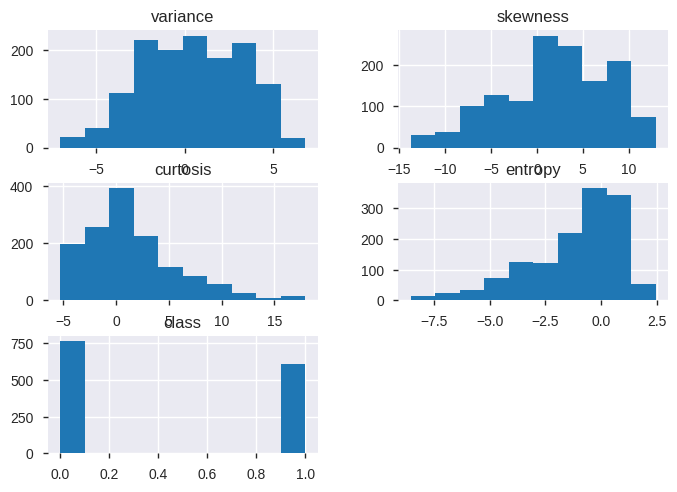

In [29]:
bank_df.hist()

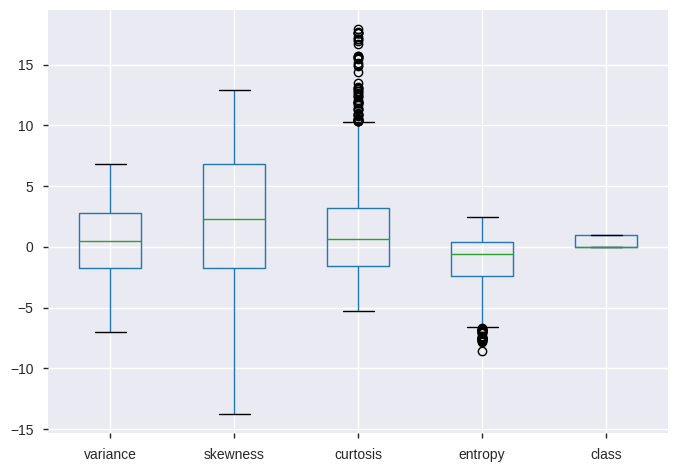

In [30]:
bank_df.boxplot()

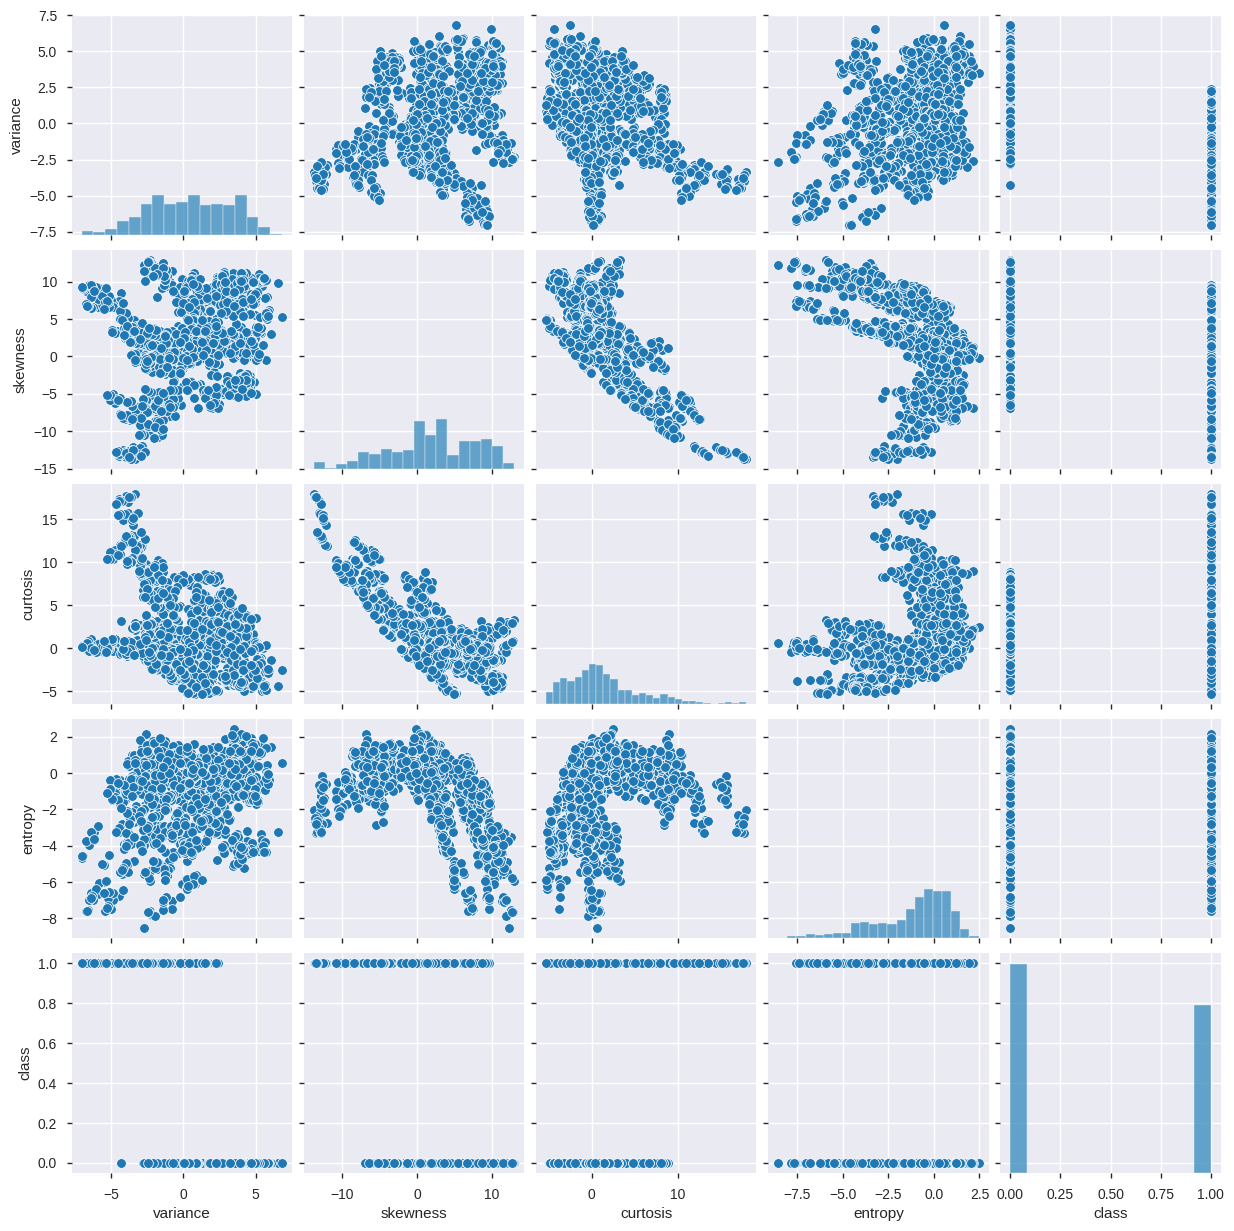

In [32]:
import seaborn as sns

sns.pairplot(bank_df)

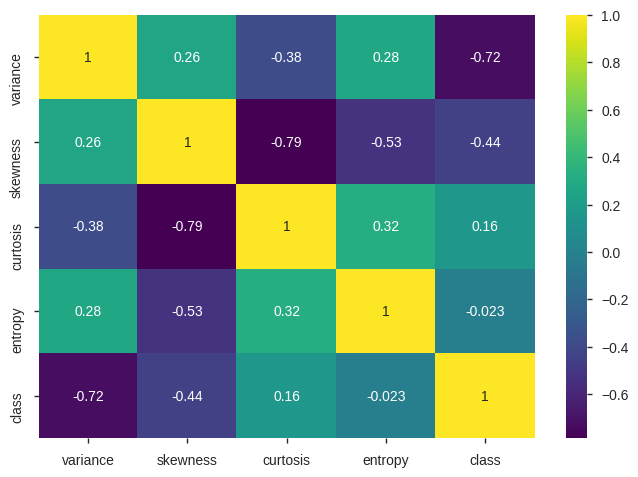

In [34]:
sns.heatmap(bank_df.corr(), cmap='viridis', annot=True)

###Questões



*   Qual o tamanho desse dataset (número de linhas, número de colunas)? 



In [35]:
bank_df.shape

(1372, 5)

* Qual variável possui o maior range (diferença entre valor máximo e mínimo)? 

In [36]:
for col in bank_df.columns:
  print(f"{col}: ", bank_df[col].max()-bank_df[col].min())

variance:  13.8669
skewness:  26.7247
curtosis:  23.2135
entropy:  10.9977
class:  1


* Qual a média da coluna skewness? 


In [37]:
bank_df.skewness.mean()

1.9223531206393603

* Qual a média da coluna entropy? 

In [38]:
bank_df.entropy.mean()

-1.191656520043731

* Qual a mediana da coluna variance? 

In [39]:
bank_df.variance.median()

0.49618

* Qual o desvio padrão da coluna curtosis? 

In [40]:
bank_df.curtosis.std()

4.310030090106595

* Qual a porcentagem de exemplos do dataset que são cédulas falsas (class=1)? 

In [41]:
bank_df[bank_df['class'] == 1]['class'].count()

610

In [43]:
print((bank_df[bank_df['class'] == 1]['class'].count()/bank_df['class'].count())*100, '%')

44.460641399416915 %


* Qual o valor da correlação de Pearson entre as variáveis skewness e curtosis? 

In [49]:
bank_df.corr()

,variance,skewness,curtosis,entropy,class
variance,1.000000,0.264026,-0.380850,0.276817,-0.724843
skewness,0.264026,1.000000,-0.786895,-0.526321,-0.444688
curtosis,-0.380850,-0.786895,1.000000,0.318841,0.155883
entropy,0.276817,-0.526321,0.318841,1.000000,-0.023424
class,-0.724843,-0.444688,0.155883,-0.023424,1.000000


####Aplicando Machine Learning

In [52]:
features = list(bank_df.columns)
features.pop()
features

['variance', 'skewness', 'curtosis', 'entropy']

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bank_df[features], bank_df['class'], random_state = 1, test_size = 0.3)

In [74]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_test

array([[-0.77491408, -2.19276019,  2.08404846,  0.08591101],
       [ 1.67809087, -0.33505371, -0.24999944,  1.09806281],
       [-0.86147317,  0.30840173, -0.78433999, -1.29305867],
       ...,
       [-0.65637503, -0.57748016,  0.17193106,  0.76642717],
       [-0.46321253,  0.2239043 , -0.75682853, -0.8409954 ],
       [ 2.27956282,  0.57338414, -0.9268522 ,  0.82632818]])

In [75]:
from sklearn.metrics import classification_report

* Qual a acurácia do KNN no conjunto de teste? 

In [84]:
from sklearn.neighbors import KNeighborsClassifier

clf_KNN = KNeighborsClassifier(n_neighbors=5)

clf_KNN.fit(X_train,y_train)

y_pred = clf_KNN.predict(X_test)

print(classification_report(y_test,y_pred,digits=8))

              precision    recall  f1-score   support

           0  1.00000000 0.99574468 0.99786780       235
           1  0.99438202 1.00000000 0.99718310       177

    accuracy                      0.99757282       412
   macro avg  0.99719101 0.99787234 0.99752545       412
weighted avg  0.99758645 0.99757282 0.99757365       412



* Qual a acurácia da Árvore de Decisão no conjunto de teste? 

In [83]:
from sklearn.tree import DecisionTreeClassifier

clf_Arvore = DecisionTreeClassifier(random_state = 1)

clf_Arvore.fit(X_train,y_train)

y_pred = clf_Arvore.predict(X_test)

print(classification_report(y_test,y_pred,digits=8))

              precision    recall  f1-score   support

           0  0.99568966 0.98297872 0.98929336       235
           1  0.97777778 0.99435028 0.98599440       177

    accuracy                      0.98786408       412
   macro avg  0.98673372 0.98866450 0.98764388       412
weighted avg  0.98799450 0.98786408 0.98787609       412



* Qual a acurácia do Random Forest no conjunto de teste? 

In [85]:
from sklearn.ensemble import RandomForestClassifier

clf_floresta = RandomForestClassifier(max_depth = 8, random_state = 1)

clf_floresta.fit(X_train, y_train)

y_pred = clf_floresta.predict(X_test)

print(classification_report(y_test,y_pred,digits=8))

              precision    recall  f1-score   support

           0  1.00000000 0.99148936 0.99572650       235
           1  0.98882682 1.00000000 0.99438202       177

    accuracy                      0.99514563       412
   macro avg  0.99441341 0.99574468 0.99505426       412
weighted avg  0.99519987 0.99514563 0.99514889       412



* Analisando o valor da importância relativa das features do Random Forest (atributo feature_importances_), qual feature melhor contribuiu para a predição de class? 

In [89]:
for feature, value in zip(features,clf_floresta.feature_importances_):
  print(f'Importância da feature {feature}:',value)


Importância da feature variance: 0.5606671827369688
Importância da feature skewness: 0.24058588894949182
Importância da feature curtosis: 0.14022781579938945
Importância da feature entropy: 0.05851911251414993


* Qual o valor da importância relativa da feature skewness? 

In [90]:
print(features[1],clf_floresta.feature_importances_[1])

skewness 0.24058588894949182


* Qual a acurácia do SVM no conjunto de teste? 

In [91]:
from sklearn.svm import SVC

clf_SVM = SVC(gamma='auto', kernel='rbf', random_state=1)

clf_SVM.fit(X_train,y_train)

y_pred = clf_SVM.predict(X_test)

print(classification_report(y_test,y_pred,digits=8))

              precision    recall  f1-score   support

           0  1.00000000 1.00000000 1.00000000       235
           1  1.00000000 1.00000000 1.00000000       177

    accuracy                      1.00000000       412
   macro avg  1.00000000 1.00000000 1.00000000       412
weighted avg  1.00000000 1.00000000 1.00000000       412



* Qual a acurácia da rede MLP no conjunto de teste? 

In [92]:
from sklearn.neural_network import MLPClassifier

clf_mlp = MLPClassifier(hidden_layer_sizes=(2,), solver='lbfgs', random_state=1)

clf_mlp.fit(X_train,y_train)

y_pred = clf_mlp.predict(X_test)

print(classification_report(y_test,y_pred,digits=8))

              precision    recall  f1-score   support

           0  1.00000000 1.00000000 1.00000000       235
           1  1.00000000 1.00000000 1.00000000       177

    accuracy                      1.00000000       412
   macro avg  1.00000000 1.00000000 1.00000000       412
weighted avg  1.00000000 1.00000000 1.00000000       412

